# Julia crash course

Author: Adam Wheeler (CCA, 2025)

In [1]:
using LinearAlgebra, Random

## just-in-time compilation and performance

In [2]:
a = rand(1000000)

1000000-element Vector{Float64}:
 0.39658441613857087
 0.9712990376176485
 0.3640820692462131
 0.15833243639573436
 0.13789967843953477
 0.8126877324433185
 0.6255925583176946
 0.261250131611379
 0.3961797624393626
 0.07959753674942904
 0.003208672519990352
 0.8478061095373812
 0.2309652786280153
 ⋮
 0.037575236915737054
 0.2557521954875993
 0.9757491759048605
 0.401937809185246
 0.2903137719002181
 0.45308050453029947
 0.7631583814576202
 0.2365987628990316
 0.45277430378870265
 0.7592706489557343
 0.10123392126228281
 0.9600805438528993

In [3]:
@time sum(a)

  0.026410 seconds (57.86 k allocations: 2.920 MiB, 98.55% compilation time)


499882.8253191584

In [4]:
function mysum(a)
    s = 0.0
    for x in a
        s += x
    end
    s
end

mysum (generic function with 1 method)

In [5]:
@time mysum(a)

  0.010250 seconds (3.80 k allocations: 194.516 KiB, 90.32% compilation time)


499882.82531916565

## multiple dispatch

In [6]:
# Define a single function with multiple methods

function process(x)
    # "$" is for string interpolation
    println("Default method: argument is of type $(typeof(x))")
end

# Add specialized methods for different types
function process(x::Int)
    println("Integer method: $x squared is $(x^2)")
end

# this is also a valid way to write a function
process(x::String) = println("String method: $(length(x)) characters, uppercase: $(uppercase(x))")

function process(x::Array)
    # TODO Print the length and sum.
end

process (generic function with 4 methods)

In [7]:
# try these out!

## Custom type + multiple dispatch

In [8]:
# Define a simple complex number type
# don't actually do this! There's a built-in one.
struct MyComplex
    real_component::Float64
    imag_component::Float64
end

# Nice string representation
function Base.show(io::IO, z::MyComplex)
    if z.imag_component >= 0
        print(io, "$(z.real_component) + $(z.imag_component)i")
    else
        print(io, "$(z.real_component) - $(abs(z.imag_component))i")
    end
end

In [9]:
# try creating a MyComplex
MyComplex(1, 2)

1.0 + 2.0i

In [10]:
# define a couple arithmetic operations

# we have to import these to override them
import Base: +, *

function +(a::MyComplex, b::MyComplex)
    MyComplex(a.real_component + b.real_component, a.imag_component + b.imag_component)
end
# "Real" is an abstract type that includes floats, rationals, etc.
+(a::MyComplex, b::Real) = MyComplex(a.real_component + b, a.imag_component)
+(a::Real, b::MyComplex) = b + a

function *(a::MyComplex, b::MyComplex)
    real_part = a.real_component * b.real_component - a.imag_component * b.imag_component
    imag_part = a.real_component * b.imag_component + a.imag_component * b.real_component
    MyComplex(real_part, imag_part)
end
*(a::MyComplex, b::Real) = MyComplex(a.real_component * b, a.imag_component * b)
*(a::Real, b::MyComplex) = b * a
;

In [11]:
# try it out
z1 = MyComplex(3.0, 4.0)
z2 = MyComplex(1.0, 2.0)
r = 2.0

z1 + r

5.0 + 4.0i

In [12]:
# this is a silly example, but this is really powerful for, e.g. dual numbers, unitful types, etc.

## basic linear algebra and broadcasting ("vectorization")

In [13]:
# Define matrices and vectors with clean syntax
A = [1 2
     3 4]
B = [5 6; 7 8] # 2×2 matrix
v = [1, 2] # column vector
w = [3, 4]' # row vector
;

In [14]:
A

2×2 Matrix{Int64}:
 1  2
 3  4

In [15]:
A' # adjoint (~transpose)

2×2 adjoint(::Matrix{Int64}) with eltype Int64:
 1  3
 2  4

In [16]:
# matrix addition
A + B

2×2 Matrix{Int64}:
  6   8
 10  12

In [17]:
# matrix multiplication
A * v

2-element Vector{Int64}:
  5
 11

In [18]:
# try w A v

In [19]:
A^2 # matrix power

2×2 Matrix{Int64}:
  7  10
 15  22

In [20]:
# if we want to add v to each column, this doesn't work, use .+ instead
# "." is special broadcasting syntax

A + v

LoadError: DimensionMismatch: a has size (2, 2), mismatch at dim 2

In [21]:
# try adding w to each row

In [22]:
# apply any function element-wise
sin.(A)

2×2 Matrix{Float64}:
 0.841471   0.909297
 0.14112   -0.756802

In [23]:
# the @. macro broadcasts every operation
@. sin(w) + A + v

2×2 Matrix{Float64}:
 2.14112  2.2432
 5.14112  5.2432

In [24]:
eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -0.3722813232690143
  5.372281323269014
vectors:
2×2 Matrix{Float64}:
 -0.824565  -0.415974
  0.565767  -0.909377

In [25]:
# compute A⁻¹ v
x = A \ v

2-element Vector{Float64}:
 0.0
 0.5

In [26]:
A * x

2-element Vector{Float64}:
 1.0
 2.0

## PythonPlot

In [27]:
# I don't recommend doing this on Google colab

using Pkg
Pkg.add("PythonPlot")
using PythonPlot

    Updating registry at `~/.julia/registries/General.toml`
   Resolving 

package versions...


   Installed MicroMamba ────────────────── v0.1.14


   Installed DataAPI ───────────────────── v1.16.0
   Installed Tables ────────────────────── v1.12.1
   Installed TableTraits ───────────────── v1.0.1
   Installed ColorTypes ────────────────── v0.12.1
   Installed Scratch ───────────────────── v1.3.0
   Installed JSON3 ─────────────────────── v1.14.3


   Installed PythonCall ────────────────── v0.9.28
   Installed FixedPointNumbers ─────────── v0.8.5
   Installed micromamba_jll ────────────── v1.5.12+0
   Installed DataValueInterfaces ───────── v1.0.0
   Installed Pidfile ───────────────────── v1.3.0
   Installed IteratorInterfaceExtensions ─ v1.0.0
   Installed OrderedCollections ────────── v1.8.1
   Installed LaTeXStrings ──────────────── v1.4.0
   Installed Reexport ──────────────────── v1.2.2


   Installed Statistics ────────────────── v1.11.1
   Installed MacroTools ────────────────── v0.5.16
   Installed pixi_jll ──────────────────── v0.41.3+0
   Installed UnsafePointers ────────────── v1.0.0
   Installed StructTypes ───────────────── v1.11.0
   Installed CondaPkg ──────────────────── v0.2.33
   Installed Colors ────────────────────── v0.13.1


   Installed PythonPlot ────────────────── v1.0.6


    Updating `~/.julia/environments/v1.11/Project.toml`
  [274fc56d] + PythonPlot v1.0.6
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [3da002f7] + ColorTypes v0.12.1
  [5ae59095] + Colors v0.13.1
  [992eb4ea] + CondaPkg v0.2.33
  [9a962f9c] + DataAPI v1.16.0
  [e2d170a0] + DataValueInterfaces v1.0.0
  [53c48c17] + FixedPointNumbers v0.8.5
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [0f8b85d8] + JSON3 v1.14.3
  [b964fa9f] + LaTeXStrings v1.4.0
  [1914dd2f] + MacroTools v0.5.16
  [0b3b1443] + MicroMamba v0.1.14
  [bac558e1] + OrderedCollections v1.8.1
  [fa939f87] + Pidfile v1.3.0
  [6099a3de] + PythonCall v0.9.28
  [274fc56d] + PythonPlot v1.0.6
  [189a3867] + Reexport v1.2.2
  [6c6a2e73] + Scratch v1.3.0
  [10745b16] + Statistics v1.11.1
  [856f2bd8] + StructTypes v1.11.0
  [3783bdb8] + TableTraits v1.0.1
  [bd369af6] + Tables v1.12.1
  [e17b2a0c] + UnsafePointers v1.0.0
⌅ [f8abcde7] + micromamba_jll v1.5.12+0
  [4d7b5844] + pixi_jll v0.41.3+0
  [4af54fe1] + LazyA

project...


    377.2 ms  ✓ Reexport


    431.9 ms  ✓ DataValueInterfaces


    672.2 ms  ✓ LaTeXStrings


    872.3 ms  ✓ OrderedCollections
    764.5 ms  ✓ Statistics


    467.8 ms  ✓ UnsafePointers
    467.6 ms  ✓ IteratorInterfaceExtensions


    561.2 ms  ✓ DataAPI


    546.9 ms  ✓ Pidfile


    831.6 ms  ✓ Scratch


   1076.5 ms  ✓ StructTypes


    558.2 ms  ✓ TableTraits


   1667.1 ms  ✓ micromamba_jll


   1920.7 ms  ✓ pixi_jll


   1470.7 ms  ✓ Tables


   4233.4 ms  ✓ MacroTools


   3870.0 ms  ✓ FixedPointNumbers


   3646.3 ms  ✓ MicroMamba


   1678.3 ms  ✓ ColorTypes


    701.6 ms  ✓ ColorTypes → StyledStringsExt


   9735.6 ms  ✓ JSON3


   5574.8 ms  ✓ Colors


   4385.1 ms  ✓ CondaPkg


  13381.2 ms  ✓ PythonCall


PythonCallExt Waiting for background task / IO / timer.
[pid 3666] waiting for IO to finish:
 Handle type        uv_handle_t->data
 timer              0x21ddda20->0x7fcfefcf18a0
This means that a package has started a background task or event source that has not finished running. For precompilation to complete successfully, the event source needs to be closed explicitly. See the developer documentation on fixing precompilation hangs for more help.


  16411.4 ms  ✓ PythonPlot


  25919.1 ms  ✓ IJulia → PythonCallExt
  26 dependencies successfully precompiled in 57 seconds. 43 already precompiled.
  4 dependencies had output during precompilation:
┌ MicroMamba
│   Downloading artifact: micromamba
└  
┌ IJulia → PythonCallExt
│  ┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
│  └   lock_file = "/home/runner/.julia/environments/v1.11/.CondaPkg/lock"
│  
│  [pid 3666] waiting for IO to finish:
│   Handle type        uv_handle_t->data
│   timer              0x21ddda20->0x7fcfefcf18a0
│  This means that a package has started a background task or event source that has not finished running. For precompilation to complete successfully, the event source needs to be closed explicitly. See the developer documentation on fixing precompilation hangs for more help.
└  
┌ CondaPkg
│   Downloading artifact: pixi
└  
┌ PythonPlot
│      CondaPkg Found dependencies: /home/runner/.julia/packages/PythonPlot/oS8x4/CondaPk

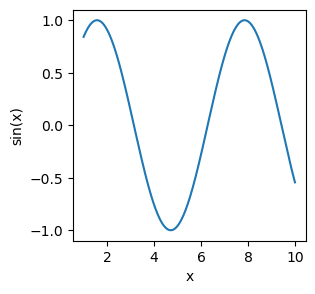

Python: Text(23.999999999999993, 0.5, 'sin(x)')

In [28]:
x = 1:0.01:10

figure(figsize=(3,3))
plot(x, sin.(x))
xlabel("x")
ylabel("sin(x)")